In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('data/house_data.csv')

In [3]:
data = data.dropna()

In [4]:
data.head()

,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0


In [5]:
dums = pd.get_dummies(data.arrondissement)
dums.columns = ['1er', '2eme', '3eme', '4eme', '10eme']

In [9]:
data = pd.concat([data, dums], axis=1)

In [11]:
data.head()

,price,surface,arrondissement,1er,2eme,3eme,4eme,10eme
0,1820,46.1,1.0,1,0,0,0,0
1,1750,41.0,1.0,1,0,0,0,0
2,1900,55.0,1.0,1,0,0,0,0
3,1950,46.0,1.0,1,0,0,0,0
4,1950,49.0,1.0,1,0,0,0,0


In [24]:
data = data[data['price'] < 20000]

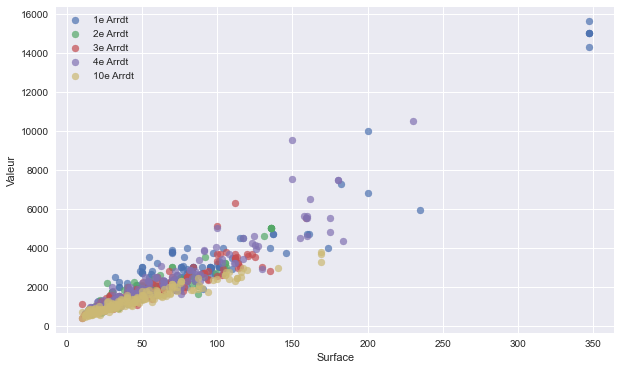

In [25]:
plt.figure(figsize = (10,6))
plt.style.use('seaborn')
for arr in data.arrondissement.unique():
    data_arr = data[data['arrondissement'] == arr]
    plt.scatter(data_arr['surface'], data_arr['price'], label='{}e Arrdt'.format(int(arr)), alpha=0.7)
plt.xlabel("Surface")
plt.ylabel("Valeur")
plt.legend()
plt.show()


In [37]:
X_train, X_test, y_train, y_test = train_test_split(data[['surface', '1er', '2eme', '3eme', '4eme', '10eme']], data['price'], train_size=0.8)

In [28]:
# X = np.matrix([np.ones(data.shape[0]), data['surface'], data['1er'], data['2eme'], data['3eme'], data['4eme'], data['10eme']]).T

In [29]:
# X

matrix([[ 1.  , 46.1 ,  1.  , ...,  0.  ,  0.  ,  0.  ],
        [ 1.  , 41.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
        [ 1.  , 55.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
        ...,
        [ 1.  , 34.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
        [ 1.  , 65.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
        [ 1.  , 21.43,  0.  , ...,  0.  ,  0.  ,  1.  ]])

In [31]:
# y = np.matrix(data['price']).T

In [38]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [40]:
regr.score(X_test, y_test)

0.8723741336564447

In [70]:
regr.predict(np.array([[80, 1, 0, 0, 0, 0]]))

array([2903.4743987])

In [71]:
regr.coef_

array([  32.51006369,  215.92878792,   44.5658387 ,  -34.12130355,
        113.05781924, -339.43114231])

In [72]:
np.array([[80, 1, 0, 0, 0, 0]]).dot(regr.coef_)

array([2816.73388278])

In [ ]:
for 